# April 30, 2019
Want to do a better isochrone fitting. Should use the isochrone table as a list of points that I can interpolate to a better fit for my stars. I can't imagine this will make a large difference but I should do it just to be safe.

In [328]:
%matplotlib notebook
import pickle as rick
import numpy as np
import matplotlib.pyplot as plt
import scipy
from mpl_toolkits.mplot3d import axes3d

from astropy.table import Table
from astropy.io import fits
import scipy.stats as sps

In [329]:
lmc12 = rick.load(open("/home/cody/Binary Search/r12-noaspcap-lmc-noiso.pck", 'rb'))
iso = fits.getdata('/home/cody/Binary Search/parsec_decamsdss_all.fits.gz')

In [250]:
teff, logg, feh = 10**iso['LOGTE'], iso['LOGG'], iso['FEH']

In [251]:
t_test, g_test, f_test, t_err, g_err, f_err = lmc12['TEFF', "LOGG", "FE_H", "TEFF_ERR", "LOGG_ERR", "FE_H_ERR"][0]

Want to get a group of values around the test values so I can interpolate to the test values

In [252]:
gd_foo, = np.where(((np.abs((10**iso['LOGTE']) - t_test) <= 3*t_err) &
                     (np.abs(iso['LOGG'] - g_test) <= 3*g_err) &
                     (np.abs(iso['FEH'] - f_test) <= 3*f_err)))
iso_small_table = iso[gd_foo]
# iso_small_table = iso_small_table[iso_small_table["AGE"] >= 1e9]

In [253]:
lmc12['TEFF', "LOGG", "FE_H", "TEFF_ERR", "LOGG_ERR", "FE_H_ERR",'ALPHA_M'][0]

TEFF,LOGG,FE_H,TEFF_ERR,LOGG_ERR,FE_H_ERR,ALPHA_M
float32,float32,float32,float32,float32,float32,float32
4085.7856,1.1739664,-0.7769414,65.96889,0.08504538,0.013898633,0.096986055


In [254]:
teff, logg, feh = 10**iso_small_table['LOGTE'], iso_small_table["LOGG"], iso_small_table['FEH']

In [255]:
g_test < 3.7 + 0.1*f_test

True

In [169]:
# iso1 = iso[t_test-3*t_err<10**iso['LOGTE']]
# iso1 = iso1[10**iso1['LOGTE'] < t_test + 3*t_err]
# iso1 = iso1[g_test-10*g_err<iso1['LOGG']]
# iso1 = iso1[iso1['LOGG'] < g_test + 10*g_err]
# iso1 = iso1[(f_test-5*f_err)<iso1['FEH']]
# iso1 = iso1[iso1['FEH'] < (f_test + 5*f_err)]
# len(iso1)

<IPython.core.display.Javascript object>


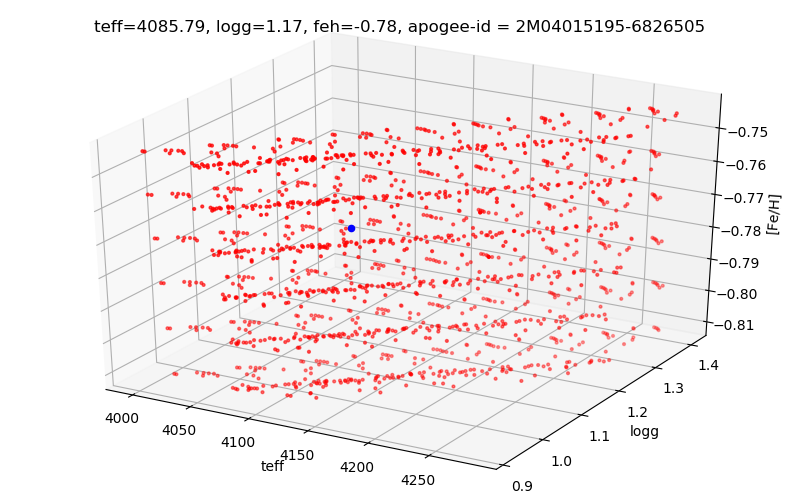

In [170]:
fig = plt.figure(figsize=(8,5))

# teff, logg, feh = 10**iso1['LOGTE'], iso1["LOGG"], iso1['FEH']
ax = axes3d.Axes3D(fig)
ax.scatter3D(teff,logg,feh, c='r', s = 4)
ax.set_xlabel('teff')
ax.set_ylabel('logg')
ax.set_zlabel('[Fe/H]')
ax.set_title("teff={:.2f}, logg={:.2f}, feh={:.2f}, apogee-id = {}".format(t_test, g_test, f_test, lmc12['APOGEE_ID'][0]))
ax.scatter3D(t_test, g_test, f_test, c = 'b')

<IPython.core.display.Javascript object>


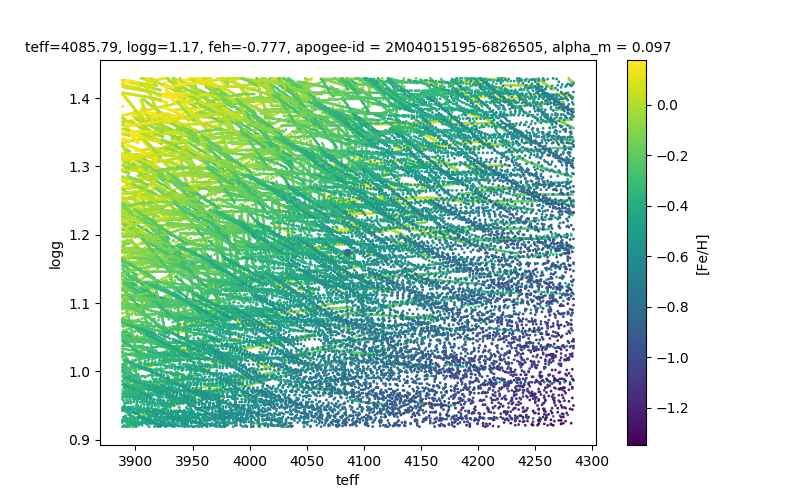

Text(0.5, 1.0, 'teff=4085.79, logg=1.17, feh=-0.777, apogee-id = 2M04015195-6826505, alpha_m = 0.097')

In [334]:
## N = 361
N = 0
t_test, g_test, f_test, t_err, g_err, f_err = lmc12['TEFF', 
                                                    "LOGG", 
                                                    "FE_H", 
                                                    "TEFF_ERR", 
                                                    "LOGG_ERR", 
                                                    "FE_H_ERR"][N]
gd_foo, = np.where(((np.abs((10**iso['LOGTE']) - t_test) <= 3*t_err) &
                     (np.abs(iso['LOGG'] - g_test) <= 3*g_err))) #&
#                      (np.abs(iso['FEH'] - f_test) <= 20*f_err)))
iso_small_table = iso[gd_foo]
teff, logg, feh = 10**iso_small_table['LOGTE'], iso_small_table["LOGG"], iso_small_table['FEH']
teff, logg, feh = np.append(teff,t_test), np.append(logg,g_test), np.append(feh, f_test)
fig = plt.figure(figsize=(8,5))

# teff, logg, feh = 10**iso_small_table['LOGTE'], iso_small_table["LOGG"], iso_small_table['FEH']
s = [1]*(len(feh) -1)+[20]
plt.scatter(teff,logg, c=feh, s = s,)
plt.xlabel('teff')
plt.ylabel('logg')
plt.colorbar(label = '[Fe/H]')
# cbar.colorbar(label = '[Fe/H]')
# ax.set_zlabel('[Fe/H]')
plt.title("teff={:.2f}, logg={:.2f}, feh={:.3f}, apogee-id = {}, alpha_m = {:.3f}".format(t_test,
                                                                                      g_test,
                                                                                      f_test,
                                                                                      lmc12['APOGEE_ID'][N],
                                                                                      lmc12['ALPHA_M'][N]),
         size = 10)
# plt.scatter(t_test, g_test,)

<IPython.core.display.Javascript object>


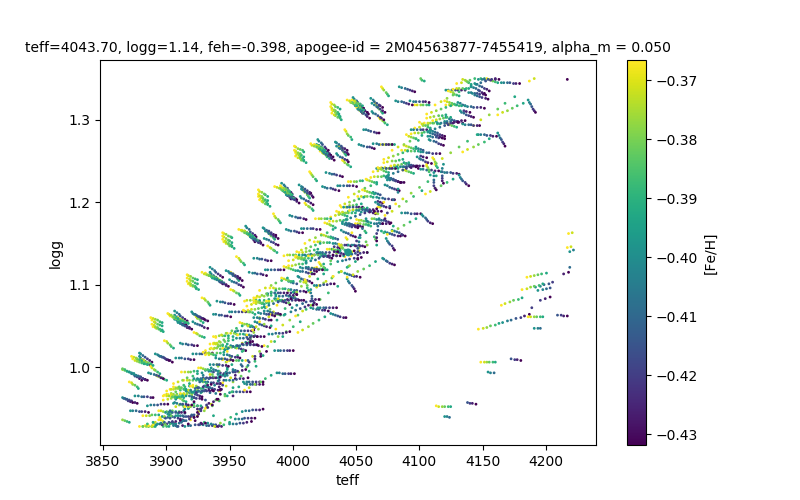

Text(0.5, 1.0, 'teff=4043.70, logg=1.14, feh=-0.398, apogee-id = 2M04563877-7455419, alpha_m = 0.050')

In [274]:
lmc12.sort('ALPHA_M')

In [215]:
lmc12

RADIALV,RADIAL_ERR,RADIAL_DATE,APOGEE_ID,FIELD,NVISITS,SNR,VHELIO_AVG,VERR,TEFF,TEFF_ERR,LOGG,LOGG_ERR,FE_H,FE_H_ERR,ALPHA_M,ALPHA_M_ERR,RV_TEFF,RV_LOGG,RV_FEH,MY_NVISITS
object,object,object,str18,str16,int32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64
[332.5908 332.55115 283.79373 285.28867 330.10538 302.2211 ],[0.1 0.1 0.1 0.1 0.1 0.1],[2458123.58085 2458123.66347 2458053.74562 2458056.72233 2458116.60827 2458358.89651],2M05000756-6826599,LMC4,4,392.184,299.335,0.00830804,4662.9624,69.79185,1.1539348,0.06217604,-0.50105256,0.009475225,-0.26526585,0.016981252,5000.0,1.0,0.0,6
[207.11606 205.93027 206.38419 206.23901 206.19519 203.4957 203.2763 201.58363 199.26299 201.2668 ],[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.10746952 0.1 ],[2458027.82589 2458052.77277 2458055.71093 2458058.71753 2458061.76277 2458093.68508 2458096.6917 2458114.65248 2458153.51532 2458119.57712],2M04511596-7533588,LMC3,10,112.848,204.172,0.0224971,3823.551,50.06209,1.5357499,0.078053676,-1.0777708,0.015092062,-0.19079395,0.028906638,3800.0,0.5,-1.0,10
[247.02744 247.16696 250.17723 250.82791 251.3487 ],[0.1 0.1 0.1 0.1 0.1],[2458026.79485 2458029.82855 2458052.72718 2458057.74579 2458061.70327],2M05175262-7236413,LMC8,5,123.015,249.126,0.0088309,3657.9841,44.215595,0.06560862,0.07376235,-1.0081079,0.015170584,-0.16302395,0.027592497,3600.0,0.5,-1.0,5
[288.53107 288.8097 290.38037 290.4411 290.8963 289.984 290.09888 290.488 290.8398 294.70972 294.42664 294.01657],[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1],[2458026.79485 2458029.82855 2458052.72718 2458057.74579 2458061.70327 2458093.65772 2458096.63159 2458114.58676 2458122.53449 2458351.88606 2458354.91318 2458357.88975],2M05265209-7227002,LMC8,12,149.019,291.188,0.00754937,3688.56,45.035744,0.13478316,0.07578736,-1.0718584,0.01556444,-0.15132394,0.029159136,3600.0,0.5,-1.0,12
[257.6541 260.721 260.8365 259.42032 259.58954 260.8318 260.99463 260.45224 260.5128 ],[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1],[2458062.774 2458121.701 2458152.56545 2458091.71809 2458094.72941 2458152.51777 2458155.57061 2458179.51735 2458182.49757],2M06281846-7008537,LMC17,9,135.472,260.014,0.0104601,3784.8188,48.172615,0.5807476,0.08363875,-1.3191484,0.017040538,-0.14830895,0.03530952,3800.0,1.0,-1.0,9
[266.21695 266.74597 266.34875 265.41953 266.28616],[0.1 0.1 0.1 0.1 0.108199],[2458115.63412 2458118.62629 2458121.6152 2458155.52208 2458092.63296],2M04572707-7049340,LMC5,5,40.0703,266.291,0.0336034,3798.6885,57.050194,0.43232262,0.08347509,-0.8009131,0.014696839,-0.14557496,0.027348407,3600.0,0.5,-1.0,5
[243.30342 243.26198 243.33566 243.28268 243.48518 243.77562],[0.1 0.1 0.1 0.1 0.1 0.1],[2458145.56358 2458115.63412 2458118.62629 2458121.6152 2458155.52208 2458092.63296],2M05044174-7042371,LMC5,5,685.34,243.408,0.00193824,3679.4763,38.899456,0.53241426,0.060115952,-0.8206763,0.012890232,-0.14026596,0.02090533,3800.0,2.0,0.5,6
[295.76395 295.64618 294.90045 295.07632 294.23206 293.9165 ],[0.1 0.1 0.1 0.1 0.1 0.1],[2458028.7847 2458031.76496 2458054.71573 2458115.57491 2458353.90138 2458356.90876],2M05132295-6614394,LMC6,6,92.6391,294.938,0.0184434,3889.0754,56.31036,0.19734536,0.08972272,-1.2188483,0.016633328,-0.13608095,0.03503433,3800.0,1.0,-1.0,6
[261.49445 262.89954 263.32114 263.52933 263.60568 264.81522],[0.1 0.1 0.1 0.1 0.1 0.1],[2458096.7509 2458116.7146 2458119.69849 2458122.69569 2458155.60919 2458185.51301],2M06363924-7453219,LMC16,6,106.36,263.303,0.0124312,3712.339,47.4277,0.23112552,0.08004748,-1.1504484,0.016086405,-0.13517696,0.031138672,3800.0,1.0,-1.0,6
